In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
df=pd.read_csv('/Users/shoeb/Downloads/medical_students_dataset (1).csv')

In [3]:
df

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,NaN,24.0,Male,176.503260,95.756997,B,30.737254,99.170685,65.0,121.0,130.0,No,No
199996,99997.0,29.0,Female,163.917675,45.225194,NaN,16.831734,97.865785,62.0,125.0,198.0,No,Yes
199997,99998.0,34.0,Female,NaN,99.648914,NaN,33.189303,98.768210,60.0,90.0,154.0,NaN,No
199998,99999.0,30.0,Female,156.446944,50.142824,A,20.486823,98.994212,61.0,106.0,225.0,No,No


In [4]:
df.describe()

,Student ID,Age,Height,Weight,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol
count,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000
mean,49974.042078,26.021561,174.947103,69.971585,23.338869,98.600948,79.503767,114.558033,184.486361
std,28879.641657,4.890528,14.447560,17.322574,7.033554,0.500530,11.540755,14.403353,37.559678
min,1.000000,18.000000,150.000041,40.000578,10.074837,96.397835,60.000000,90.000000,120.000000
25%,24971.750000,22.000000,162.476110,54.969838,17.858396,98.264750,70.000000,102.000000,152.000000
50%,49943.500000,26.000000,174.899914,69.979384,22.671401,98.599654,80.000000,115.000000,184.000000
75%,74986.000000,30.000000,187.464417,84.980097,27.997487,98.940543,90.000000,127.000000,217.000000
max,100000.000000,34.000000,199.998639,99.999907,44.355113,100.824857,99.000000,139.000000,249.000000


In [5]:
X = df.iloc[:,:-2]
y = df.iloc[:,[-2,-1]]


In [6]:
X

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0
...,...,...,...,...,...,...,...,...,...,...,...
199995,NaN,24.0,Male,176.503260,95.756997,B,30.737254,99.170685,65.0,121.0,130.0
199996,99997.0,29.0,Female,163.917675,45.225194,NaN,16.831734,97.865785,62.0,125.0,198.0
199997,99998.0,34.0,Female,NaN,99.648914,NaN,33.189303,98.768210,60.0,90.0,154.0
199998,99999.0,30.0,Female,156.446944,50.142824,A,20.486823,98.994212,61.0,106.0,225.0


In [7]:
y

,Diabetes,Smoking
0,No,NaN
1,No,No
2,Yes,No
3,No,Yes
4,No,No
...,...,...
199995,No,No
199996,No,Yes
199997,NaN,No
199998,No,No


In [12]:
from sklearn.impute import SimpleImputer
missing_value = df.isnull().sum()
missing_value

Student ID            0
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64

In [13]:
df["Student ID"]=df["Student ID"].interpolate()
df

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,4.0,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,99996.0,24.0,Male,176.503260,95.756997,B,30.737254,99.170685,65.0,121.0,130.0,No,No
199996,99997.0,29.0,Female,163.917675,45.225194,NaN,16.831734,97.865785,62.0,125.0,198.0,No,Yes
199997,99998.0,34.0,Female,NaN,99.648914,NaN,33.189303,98.768210,60.0,90.0,154.0,NaN,No
199998,99999.0,30.0,Female,156.446944,50.142824,A,20.486823,98.994212,61.0,106.0,225.0,No,No


In [15]:
imputer = SimpleImputer(missing_values = np.nan,strategy= 'mean')
imputer.fit(df.iloc[:,[1,3,4,6,7,8,9,10]])
df.iloc[:,[1,3,4,6,7,8,9,10]]=imputer.transform(df.iloc[:,[1,3,4,6,7,8,9,10]])
df

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.000000,Female,161.777924,72.354947,O,27.645835,98.600948,95.0,109.000000,203.0,No,NaN
1,2.0,26.021561,Male,152.069157,47.630941,B,23.338869,98.714977,93.0,104.000000,163.0,No,No
2,3.0,32.000000,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.000000,216.0,Yes,No
3,4.0,30.000000,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.000000,141.0,No,Yes
4,5.0,23.000000,Female,174.947103,46.234173,O,23.338869,98.480008,95.0,114.558033,231.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,99996.0,24.000000,Male,176.503260,95.756997,B,30.737254,99.170685,65.0,121.000000,130.0,No,No
199996,99997.0,29.000000,Female,163.917675,45.225194,NaN,16.831734,97.865785,62.0,125.000000,198.0,No,Yes
199997,99998.0,34.000000,Female,174.947103,99.648914,NaN,33.189303,98.768210,60.0,90.000000,154.0,NaN,No
199998,99999.0,30.000000,Female,156.446944,50.142824,A,20.486823,98.994212,61.0,106.000000,225.0,No,No


In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
categorical_features = ['Gender', 'Blood Type', 'Diabetes', 'Smoking']

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_features)], remainder='passthrough')
x = ct.fit_transform(df)

le = LabelEncoder()
y = le.fit_transform(df['Diabetes'])


In [27]:
x


array([[  1.,   0.,   0., ...,  95., 109., 203.],
       [  0.,   1.,   0., ...,  93., 104., 163.],
       [  1.,   0.,   0., ...,  76., 130., 216.],
       ...,
       [  1.,   0.,   0., ...,  60.,  90., 154.],
       [  1.,   0.,   0., ...,  61., 106., 225.],
       [  1.,   0.,   0., ...,  95., 133., 132.]])

In [28]:
#split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
x_train

array([[  0.        ,   0.        ,   1.        , ...,  87.        ,
        106.        , 223.        ],
       [  0.        ,   1.        ,   0.        , ...,  64.        ,
        127.        , 184.48636111],
       [  1.        ,   0.        ,   0.        , ...,  62.        ,
        114.        , 213.        ],
       ...,
       [  1.        ,   0.        ,   0.        , ...,  68.        ,
        101.        , 180.        ],
       [  0.        ,   0.        ,   1.        , ...,  70.        ,
        114.55803333, 234.        ],
       [  0.        ,   1.        ,   0.        , ...,  67.        ,
        132.        , 153.        ]])

In [30]:
#featurescaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train =sc.fit_transform(x_train)
x_test =sc.transform(x_test)

In [31]:
x_train

array([[-9.03483800e-01, -9.05928241e-01,  3.00312924e+00, ...,
         6.85217667e-01, -6.27497762e-01,  1.08160835e+00],
       [-9.03483800e-01,  1.10384019e+00, -3.32986002e-01, ...,
        -1.41608427e+00,  9.09815430e-01,  1.18620968e-03],
       [ 1.10682671e+00, -9.05928241e-01, -3.32986002e-01, ...,
        -1.59880618e+00, -4.18546415e-02,  8.01078606e-01],
       ...,
       [ 1.10682671e+00, -9.05928241e-01, -3.32986002e-01, ...,
        -1.05064046e+00, -9.93524713e-01, -1.24669566e-01],
       [-9.03483800e-01, -9.05928241e-01,  3.00312924e+00, ...,
        -8.67918550e-01, -1.00359368e-03,  1.39019108e+00],
       [-9.03483800e-01,  1.10384019e+00, -3.32986002e-01, ...,
        -1.14200141e+00,  1.27584238e+00, -8.82099888e-01]])

In [32]:
x_test


array([[ 1.10682671e+00, -9.05928241e-01, -3.32986002e-01, ...,
         1.69018816e+00,  7.63404649e-01,  1.02550240e+00],
       [-9.03483800e-01,  1.10384019e+00, -3.32986002e-01, ...,
         1.50746625e+00,  1.12943160e+00, -2.64934440e-01],
       [-9.03483800e-01, -9.05928241e-01,  3.00312924e+00, ...,
         3.54638686e-04,  8.36610039e-01, -1.02236476e+00],
       ...,
       [-9.03483800e-01,  1.10384019e+00, -3.32986002e-01, ...,
        -5.93835688e-01,  1.20263699e+00, -6.85636162e-02],
       [-9.03483800e-01,  1.10384019e+00, -3.32986002e-01, ...,
        -1.37030918e-01, -1.00359368e-03, -1.05041774e+00],
       [ 1.10682671e+00, -9.05928241e-01, -3.32986002e-01, ...,
         1.05066148e+00,  1.27584238e+00,  1.50240298e+00]])

In [35]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
#secondpart

In [52]:
insurance=pd.read_csv('/Users/shoeb/Downloads/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [88]:
g= insurance.iloc[:,[0]]
h=insurance.iloc[:,[-1]]

In [89]:
g

,age
0,19
1,18
2,28
3,33
4,32
...,...
1333,50
1334,18
1335,18
1336,21


In [84]:
h

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [91]:
#catdata
p=insurance.iloc[:,[]]


In [90]:
from sklearn.impute import SimpleImputer
missing_values1=insurance.isnull().sum()
missing_values1

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [92]:
from sklearn.model_selection import train_test_split
g_train,g_test,h_train,h_test=train_test_split(g,h,test_size=0.2,random_state=0)

In [93]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(g_train, h_train)

LinearRegression()

In [98]:
h_pred = regressor.predict(g_test)

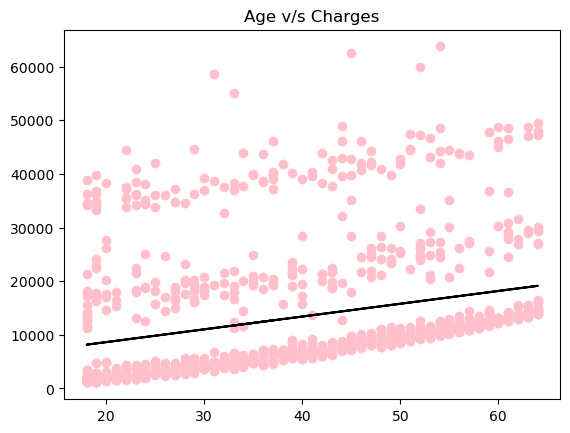

In [100]:
plt.scatter(g_train, h_train, color='pink')
plt.plot(g_train,regressor.predict(g_train),color='#000000')
plt.title('Age v/s Charges')
plt.show()

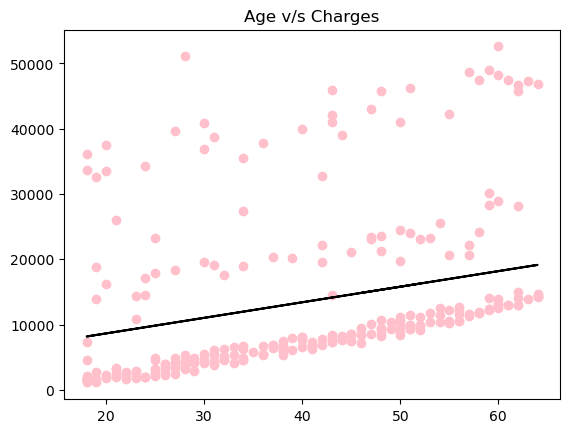

In [102]:
plt.scatter(g_test, h_test, color='pink')
plt.plot(g_test,regressor.predict(g_test),color='#000000')
plt.title('Age v/s Charges')
plt.show()

In [103]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
categorical_features = ['sex','region','smoker']
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),categorical_features)],remainder='passthrough')
p = ct.fit_transform(insurance)
le = LabelEncoder()
q = le.fit_transform(insurance['smoker'])

In [104]:
from sklearn.model_selection import train_test_split
g_train, g_test, h_train, h_test = train_test_split(g,h, test_size=0.2, random_state=0)

In [105]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(g_train,h_train)

LinearRegression()

In [106]:
h_pred = ml.predict(g_test)

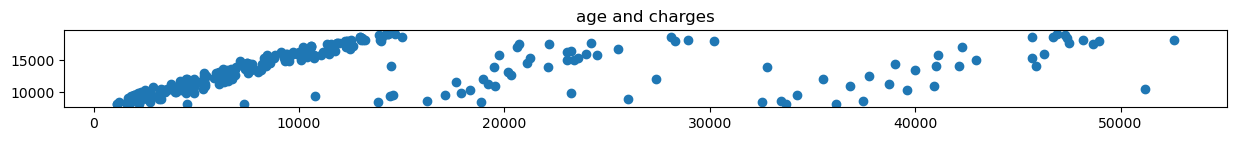

In [108]:
plt.figure(figsize=(15,1))
plt.scatter(h_test,h_pred)
plt.title('age and charges')
plt.show()